<a href="https://colab.research.google.com/github/mashdas/nlp_101/blob/master/shakespeare_wannabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [26]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-05-28 19:36:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.005s  

2020-05-28 19:36:48 (18.0 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
data=open('/tmp/sonnets.txt').read()


In [28]:
data

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makest waste in niggarding.\nPity the world, or else this glutton be,\nTo eat the world's due, by the grave and thee.\nWhen forty winters shall beseige thy brow,\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tatter'd weed, of small worth held:\nThen being ask'd where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say, within thine own deep-sunken eyes,\nWere an all-eating shame and thriftless praise.\nHow much mor

In [0]:
corpus=data.split("\n")

In [30]:
corpus[0:3]

['FROM fairest creatures we desire increase,',
 "That thereby beauty's rose might never die,",
 'But as the riper should by time decease,']

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index=tokenizer.word_index

In [32]:
word_index##Dictionary of words and corresponding values

{'and': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'my': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'love': 14,
 'not': 15,
 'but': 16,
 'a': 17,
 'me': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'you': 24,
 'his': 25,
 'which': 26,
 'when': 27,
 'it': 28,
 'this': 29,
 'by': 30,
 'your': 31,
 'doth': 32,
 'do': 33,
 'from': 34,
 'on': 35,
 'or': 36,
 'no': 37,
 'then': 38,
 'have': 39,
 'what': 40,
 'are': 41,
 'if': 42,
 'more': 43,
 'mine': 44,
 'their': 45,
 'shall': 46,
 'sweet': 47,
 'time': 48,
 'will': 49,
 'they': 50,
 'beauty': 51,
 'nor': 52,
 'eyes': 53,
 'art': 54,
 'her': 55,
 'heart': 56,
 'yet': 57,
 'o': 58,
 'than': 59,
 'can': 60,
 'should': 61,
 'thine': 62,
 'now': 63,
 'where': 64,
 'make': 65,
 'one': 66,
 'hath': 67,
 'he': 68,
 'fair': 69,
 'still': 70,
 'how': 71,
 'eye': 72,
 'him': 73,
 'like': 74,
 'true': 75,
 'see': 76,
 'am': 77,
 'she': 78,
 'those': 79,
 'though': 80,
 'being': 81,
 'some'

In [0]:

total_words=len(tokenizer.word_index)+1##TO include the oov token
##Creating input sequences:
input_sequences=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [0]:
#pad sequences
max_seq_len=max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_seq_len,padding="pre"))


In [35]:
#create predictors and labels
##First n-1 elements will be ip and last one will be op
predictors,labels=input_sequences[:,:-1],input_sequences[:,-1]
labels

array([ 417,  877,  166, ..., 3210,   15,   14], dtype=int32)

In [0]:
#Need to one hot encode
labels = ku.to_categorical(labels, num_classes=total_words)

In [37]:
for x in labels:
  for a,y in enumerate(x):
    if y!=0:
      print(a)
  break    

417


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dropout,Dense

model=Sequential()
model.add(Embedding(total_words,100,input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [39]:
history=model.fit(predictors,labels,epochs=100,verbose=1)

Epoch 1/100
484/484 [==============================] - 63s 131ms/step - loss: 6.9163 - accuracy: 0.0219
Epoch 2/100
484/484 [==============================] - 61s 126ms/step - loss: 6.5013 - accuracy: 0.0211
Epoch 3/100
484/484 [==============================] - 61s 126ms/step - loss: 6.3980 - accuracy: 0.0266
Epoch 4/100
484/484 [==============================] - 59s 123ms/step - loss: 6.2650 - accuracy: 0.0321
Epoch 5/100
484/484 [==============================] - 60s 124ms/step - loss: 6.1739 - accuracy: 0.0374
Epoch 6/100
484/484 [==============================] - 62s 128ms/step - loss: 6.0901 - accuracy: 0.0378
Epoch 7/100
484/484 [==============================] - 63s 130ms/step - loss: 6.0104 - accuracy: 0.0409
Epoch 8/100
484/484 [==============================] - 59s 122ms/step - loss: 5.9260 - accuracy: 0.0438
Epoch 9/100
484/484 [==============================] - 62s 129ms/step - loss: 5.8269 - accuracy: 0.0493
Epoch 10/100
484/484 [==============================] - 63s 131m

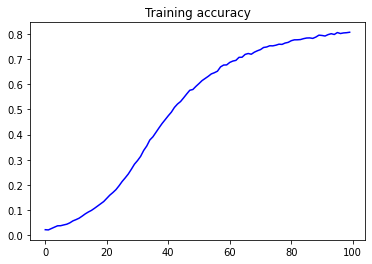

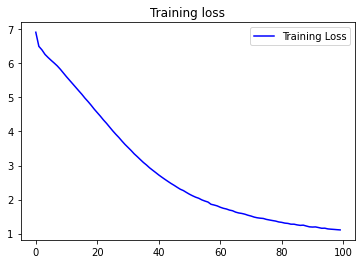

In [42]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [48]:
seed_text = "I am a man of constant sorrow"
next_words = 40
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I am a man of constant sorrow doth free twain brought to mow invent lease doth glance change youth live kind might lie to thee die of mine eye shall write write of thee true men see thine 'will ' doth none live doth live still he
